In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")



## Goals and Commands

#### Goals
1. Find Characteristics Polynomal, eigenvalues and eigenvectors
2. Diagonalization
3. Markov Chains

#### Commands
1. linalg.eigvals(), linalg.eig()
2. charpoly(),eigenvals(), eigenvecs()
3. diagonalize(),is_diagonalizable()


First let's look how to work with eigenstuff using NumPy. The main two comands here are np.linalg.eigval() that returns eigenvalues and no.linalg.eig() that returs both eigenvalues and eigenvectors:

In [2]:
A=np.array([[1,1,1],[2,3,-1],[0,1,2]])
np.linalg.eigvals(A)

array([3.61803399, 1.        , 1.38196601])

In [3]:
np.linalg.eig(A)

(array([3.61803399, 1.        , 1.38196601]),
 array([[-0.46534113,  0.72760688,  0.64793616],
        [-0.75293776, -0.48507125, -0.40044657],
        [-0.46534113,  0.48507125,  0.64793616]]))

**Note that above, eigenvectors stored vertically, so the first column is an eigenvector corresponding to the first eigenvalue.**

Now with SymPy, we have few more things:

In [4]:
A=sp.Matrix(A)

In [5]:
poly=A.charpoly().as_expr() # charactheristic polynomial
poly

In [6]:
A.eigenvals() #returns eigenvalues followed by their multiplicity

In [7]:
A.eigenvects()  # same as above but also lists eigenvectors

⎡                 ⎛           ⎡⎡  1   ⎤⎤⎞  ⎛           ⎡⎡  1   ⎤⎤⎞⎤
⎢⎛      ⎡⎡3/2⎤⎤⎞  ⎜           ⎢⎢      ⎥⎥⎟  ⎜           ⎢⎢      ⎥⎥⎟⎥
⎢⎜      ⎢⎢   ⎥⎥⎟  ⎜5   √5     ⎢⎢1   √5⎥⎥⎟  ⎜√5   5     ⎢⎢1   √5⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢-1 ⎥⎥⎟, ⎜─ - ──, 1, ⎢⎢─ - ──⎥⎥⎟, ⎜── + ─, 1, ⎢⎢─ + ──⎥⎥⎟⎥
⎢⎜      ⎢⎢   ⎥⎥⎟  ⎜2   2      ⎢⎢2   2 ⎥⎥⎟  ⎜2    2     ⎢⎢2   2 ⎥⎥⎟⎥
⎢⎝      ⎣⎣ 1 ⎦⎦⎠  ⎜           ⎢⎢      ⎥⎥⎟  ⎜           ⎢⎢      ⎥⎥⎟⎥
⎣                 ⎝           ⎣⎣  1   ⎦⎦⎠  ⎝           ⎣⎣  1   ⎦⎦⎠⎦

In [8]:
sp.factor(poly.as_expr())  #factoring

In [9]:
P, D = A.diagonalize()  #diagonalization
P,D

⎛                      ⎡1    0       0   ⎤⎞
⎜⎡3     1       1   ⎤  ⎢                 ⎥⎟
⎜⎢                  ⎥  ⎢   5   √5        ⎥⎟
⎜⎢    1   √5  1   √5⎥  ⎢0  ─ - ──    0   ⎥⎟
⎜⎢-2  ─ - ──  ─ + ──⎥, ⎢   2   2         ⎥⎟
⎜⎢    2   2   2   2 ⎥  ⎢                 ⎥⎟
⎜⎢                  ⎥  ⎢           √5   5⎥⎟
⎜⎣2     1       1   ⎦  ⎢0    0     ── + ─⎥⎟
⎝                      ⎣           2    2⎦⎠

In [10]:
A.is_diagonalizable() ## check if A is diagonalizable

True

Sometimes we might want to plot characteristic polynomial and so we would want to convert it to NumPy function. In that case, using $\lambda$ as a variable will not work. So, we should express characterisitc polynomial with another variable and then use lambdify to convert it to NumPy function.

In [11]:
sp.var('x')
polyx=A.charpoly(x).as_expr()
polyx

In [12]:
cp=sp.lambdify(x,polyx)

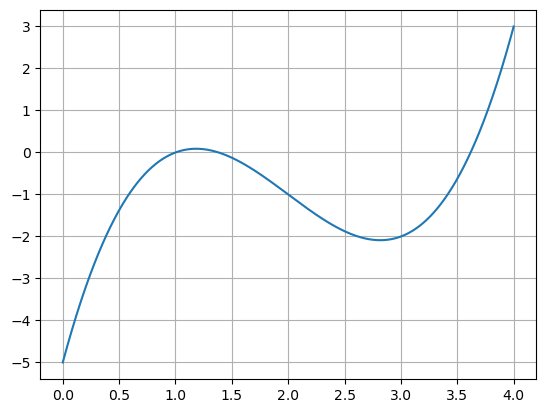

In [13]:
fig, ax = plt.subplots()
xv=np.linspace(0, 4, 1000)
ax.grid()
ax.plot(xv, cp(xv))
plt.show()

#### Example

Let $A=\begin{bmatrix} 1 & 1 \\ 0.5 & 1.5 \end{bmatrix}$. Draw in blue vectors with norm 1 in ${\mathbb{R}^2}$ (i.e. unit circle). In red, draw all images of blue points under transformation ${\bf x} \rightarrow A{\bf x}$. Then in green draw two eigenspaces of A.

In [2]:
A=np.array([[1,1],[0.5,1.5]])
Eigenvectors=np.linalg.eig(A)[1]
Eigenvectors

array([[-0.89442719, -0.70710678],
       [ 0.4472136 , -0.70710678]])

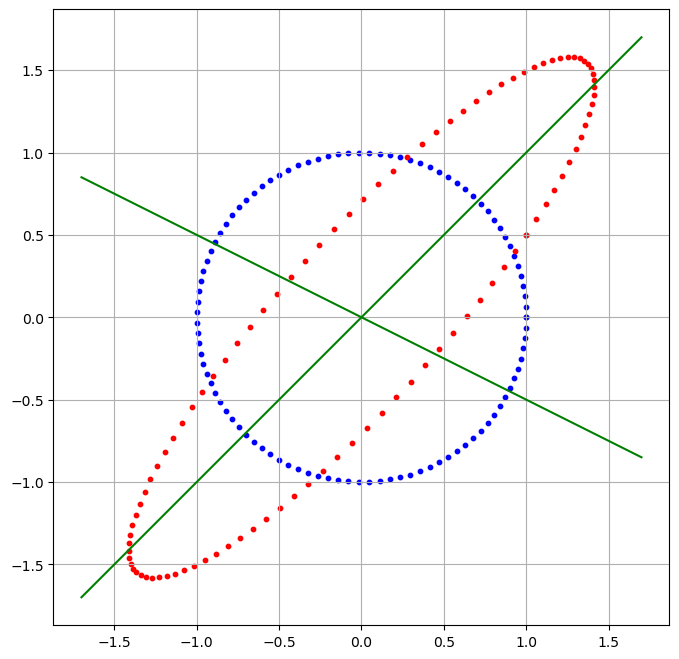

In [3]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.grid()
ax.set_aspect(1)

# unit circle (blue)
t = np.linspace(0, 2*np.pi, 100)
x=np.cos(t)
y=np.sin(t)
plt.scatter(x,y, s=10, color='b')

#images (red)
vec=np.array([x,y])
imag=A@vec
plt.scatter(imag[0],imag[1], s=10, color='r')

#lines (eigenspaces) (green)
lx=np.linspace(-1.7,1.7,100)
ly1=lx*Eigenvectors[1][0]/Eigenvectors[0][0]
ly2=lx*Eigenvectors[1][1]/Eigenvectors[0][1]
plt.plot(lx,ly1,'-g')  
plt.plot(lx,ly2,'-g')
plt.show()

#### End of Example

Next let's look at example with Markov Chain:

#### Example

Suppose we have three cities (A, B and C). Matrix $P =\begin{bmatrix} 0.9 & 0.1 & 0.1 \\ 0.09 & 0.85 & 0.1 \\0.01 & 0.05 & 0.8\end{bmatrix}$ contains proportions of yearly population migration. (For example, the second value in column one (0.09) means that 9\% of population of city A will move to city B. ) Suppose initial populations of cities A, B and C were 16000, 20000 and 40000 respectivelly. Track the population change over 100 years.

#### Solution

In [13]:
P=np.array([[0.9, 0.1, 0.1],[0.09, 0.85, 0.1],[0.01, 0.05, 0.8]])

#we will create a 3x100 array. First column is our initial populations, second column is population after 1 year, etc.
X=np.zeros((101, 3))
X[0]=np.array([16000, 20000, 40000])

for i in range(100):
    X[i+1]=P@X[i]

X[100]

array([37999.99999552, 28880.00000089,  9120.00000359])

We can see that the population of cities A and B went up and population if city C went down after 100 years. Let's plot all the changes:

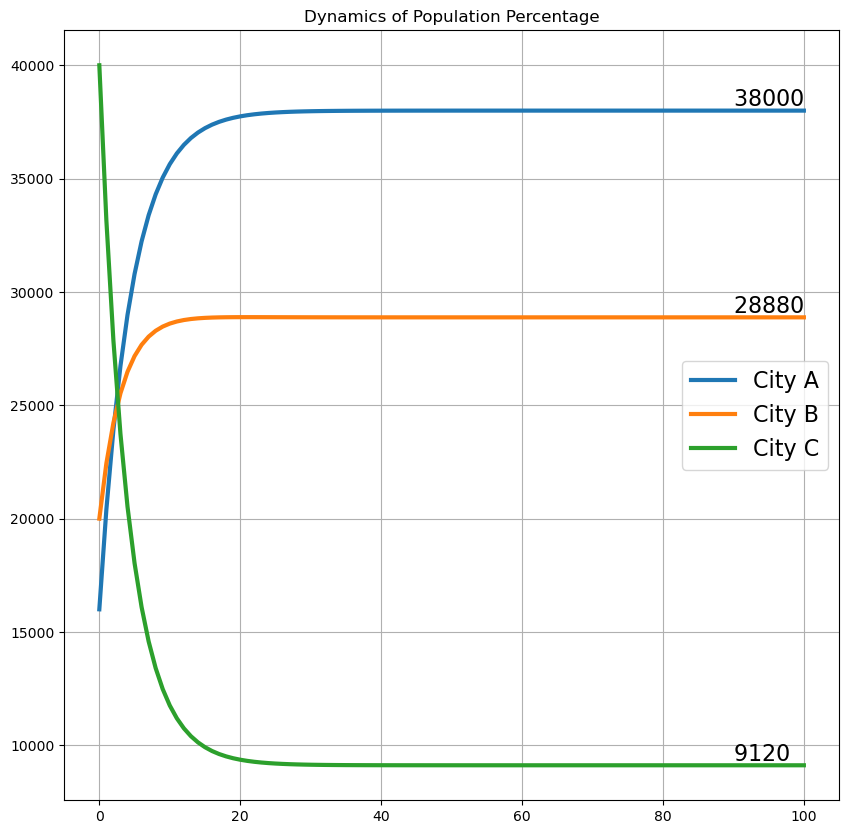

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))

cit = ['City A', 'City B', 'City C']
for i in [0, 1, 2]:
    ax.plot(X[:, i], lw = 3, label = cit[i] )
    ax.text(x = 90, y = X[-1,i]+200, s = '$%.0f$' %X[-1,i], size = 16)  #text showing final population

ax.legend(fontsize = 16)
ax.grid()
ax.set_title('Dynamics of Population Percentage')
plt.show()

Notice that the stable level (i.e steady state) was achived quite fast (about 30 years). Let's redraw this graph only showing the first 30 years:


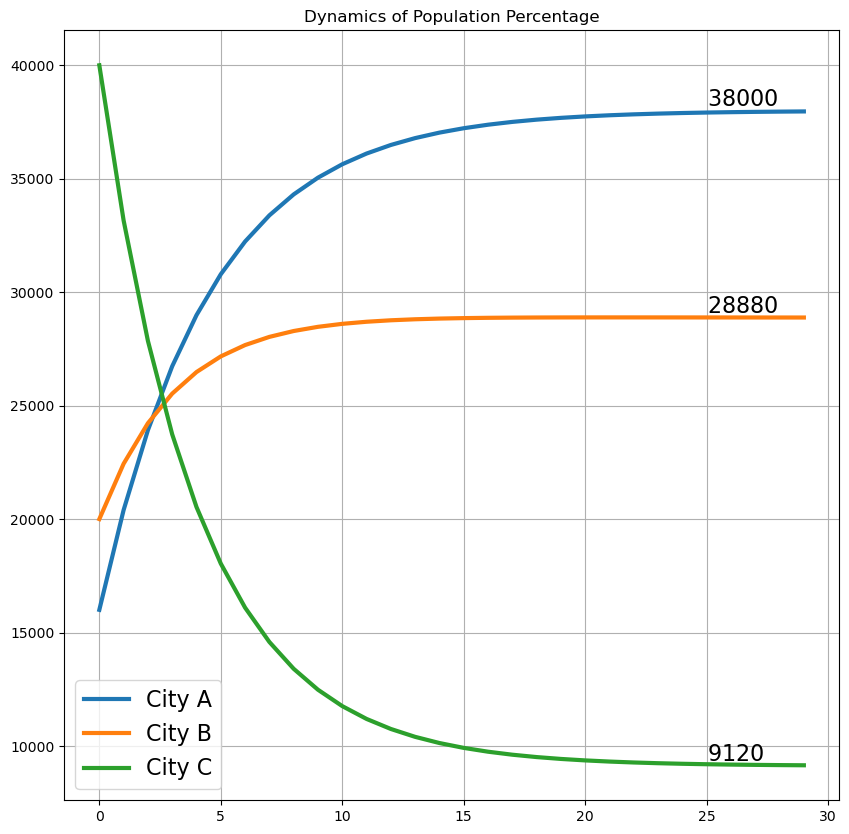

In [15]:
fig, ax = plt.subplots(figsize = (10, 10))

cit = ['City A', 'City B', 'City C']
for i in [0, 1, 2]:
    ax.plot(X[:30, i], lw = 3, label = cit[i] )
    ax.text(x = 25, y = X[-1,i]+200, s = '$%.0f$' %X[-1,i], size = 16)  #text showing final population

ax.legend(fontsize = 16)
ax.grid()
ax.set_title('Dynamics of Population Percentage')
plt.show()

As a side-problem, lets find the steady state vector of P as an eigenvector with eigenvalue 1. We will use equation $(P-I){\bf x}={\bf 0}$

In [16]:
I=np.identity(3)
ev=la.null_space(P-I)  #reminder that we can't use solve since we will only get trivial solution.
ev

array([[0.78201406],
       [0.59433068],
       [0.18768337]])

We have an eigenvector, but it doesnt give us actual population yet. However, this vector does have correct proportions. To get the actual population, multiply by total population of 3 cities over total proportions. 

Note: we don't care about normalizations (as in when the norm is 1) here. We want a probability vector, so we want the sum of entries to equal to 1. This is why we divide by the sum of entries. 

In [17]:
(ev/np.sum(ev))*np.sum(X[0])

array([[38000.],
       [28880.],
       [ 9120.]])

#### End of Example